In [ ]:
!pip install yfinance
!pip install matplotlib
!pip install html5lib lxml


# !pip install pandas==1.3.3

In [4]:
import yfinance as yf

tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

tesla_data.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [15]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Define URL for Tesla revenue data
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {"User-Agent": "Mozilla/5.0"}  # Prevent blocking
response = requests.get(url, headers=headers)

# Parse HTML content
soup = BeautifulSoup(response.text, "html.parser")

# Find all tables
tables = soup.find_all("table")

# Select the correct table (usually the second one)
tesla_revenue_table = tables[1]  # Try changing index if necessary

# Extract table rows
rows = tesla_revenue_table.find_all("tr")

# Convert table data into a list
data = []
for row in rows:
    cols = row.find_all("td")
    cols = [col.text.strip() for col in cols]
    if cols:  # Avoid empty rows
        data.append(cols)

# Convert to Pandas DataFrame
tesla_revenue = pd.DataFrame(data, columns=["Date", "Revenue"])
tesla_revenue = tesla_revenue.dropna()  # Drop missing values

# Display the last 5 rows
tesla_revenue.tail()


,Date,Revenue
58,2010-06-30,$28
59,2010-03-31,$21
60,2009-12-31,
61,2009-09-30,$46
62,2009-06-30,$27


In [16]:

gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

gme_data.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
2002-02-14 00:00:00-05:00,1.712706,1.716073,1.670625,1.683249,11021600,0.0,0.0
2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [18]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Define the URL for GameStop revenue data
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
headers = {"User-Agent": "Mozilla/5.0"}  # Prevent blocking
response = requests.get(url, headers=headers)

# Parse HTML content
soup = BeautifulSoup(response.text, "html.parser")

# Find all tables
tables = soup.find_all("table")

# Print the number of tables found (for debugging)
print(f"Total tables found: {len(tables)}")

# Select the correct table (adjust index if necessary)
gme_revenue_table = tables[1]  # Change index if needed

# Extract table rows
rows = gme_revenue_table.find_all("tr")

# Convert table data into a list
data = []
for row in rows:
    cols = row.find_all("td")
    cols = [col.text.strip() for col in cols]
    if cols:  # Ignore empty rows
        data.append(cols)

# Convert to Pandas DataFrame
gme_revenue = pd.DataFrame(data, columns=["Date", "Revenue"])
gme_revenue = gme_revenue.dropna()  # Drop missing values

# Display the first 5 rows
gme_revenue.head()



Total tables found: 6


,Date,Revenue
0,2024-10-31,$860
1,2024-07-31,$798
2,2024-04-30,$882
3,2024-01-31,"$1,794"
4,2023-10-31,"$1,078"


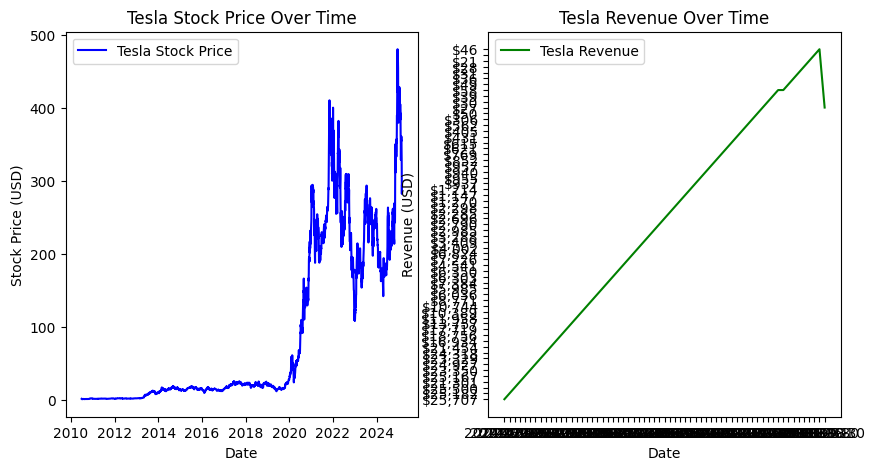

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(tesla_data.index, tesla_data["Close"], label="Tesla Stock Price", color="blue")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.title("Tesla Stock Price Over Time")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(tesla_revenue["Date"], tesla_revenue["Revenue"], label="Tesla Revenue", color="green")
plt.xlabel("Date")
plt.ylabel("Revenue (USD)")
plt.title("Tesla Revenue Over Time")
plt.legend()

plt.show()


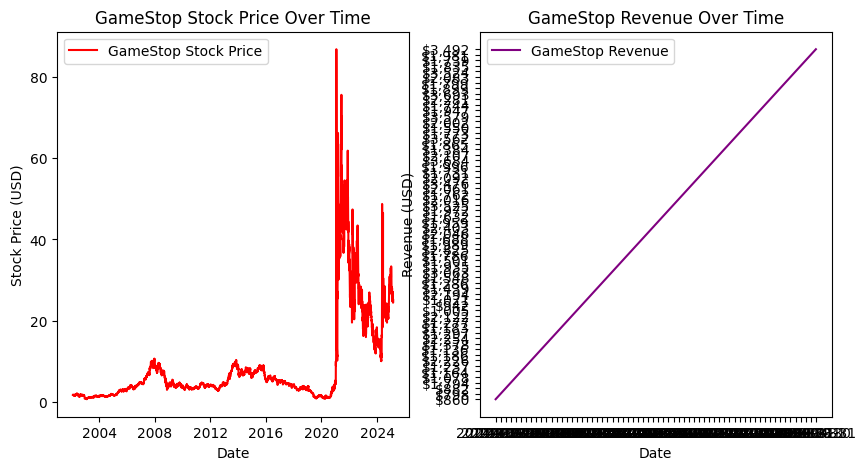

In [20]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(gme_data.index, gme_data["Close"], label="GameStop Stock Price", color="red")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.title("GameStop Stock Price Over Time")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(gme_revenue["Date"], gme_revenue["Revenue"], label="GameStop Revenue", color="purple")
plt.xlabel("Date")
plt.ylabel("Revenue (USD)")
plt.title("GameStop Revenue Over Time")
plt.legend()

plt.show()
